Die folgende Zelle müsst ihr einmal ausführen. Also konkret auf die Zelle klicken und dann auf den Playbutton über diesem Text klicken.

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Python Basics
Im Folgenden sind alle notwendigen grundlegenden Python-Instruktionen gegeben.

In [ ]:
a = 0
b = a+3
c = b*2
d = c/3
print(a)
print(b)
print(a,b,c,d)

In [ ]:
a = [5, 3, 6]
print(a, a[0], a[1], a[2])

In [ ]:
for i in range(20): # range(20) erzeugt quasi eine Liste (iterator) von indices von 0 bis (20-1) über die dann iteriert wird. list(range(20)) gibt euch die wahre Liste
    print(i, end=", ")

In [ ]:
for i in a: # a wurde zuvor als a = [5, 3, 6] definiert
    print(i, end=", ")

In [ ]:
print("{a}") #String
print(f"{a}") #String indem die variable a interpretiert wird

In [ ]:
def foo(a): #foo ist der Name der Funktion, a ist der parameter
    print(f"Hello {a}")

foo("World")

In [ ]:
class Foo():
    def __init__(self, inp): # Initialisierung, Aufruf Foo(inp)
        self.inp = inp

    def __call__(self): # Aufruf der Klasse als wäre sie eine Funktion, Auruf Foo(inp)()
        return self.inp

    def foo(self): # Aufruf einer definierten Methode auf der Klasse, Aufruf Foo(inp).foo()
        return self.inp + self.inp

object = Foo("input") # input ist ein String
call = object()
foo = object.foo()
print(object, call, foo)

object = Foo(7) # input ist die Zahl 7
call = object()
foo = object.foo()
print(object, call, foo)

## Numpy
Im Folgenden findet Ihr Instruktionen aus dem NumPy-Paket, welches wir als np importiert haben. Dieses Paket vereinfacht das Rechnen mit Vektoren und Matrizen.
### Inneres Produkt

In [ ]:
a = np.array([1,2,3]) # np.array(a) convertiert eine Liste a in einen Vektor der die Elemente aus a enthält.
b = np.array([1,1,1])
print(a,b,np.inner(a, b)) # Inneres Produkt

### Matrix Multiplikation

In [ ]:
X = np.array([[1,2],[3,4]]) # np.array kann auch mit Listen von Listen arbeiten und konvertiert diese dann zu Matrizen (oder Tensoren bei Listen von Listen von ...)
w = np.array([1,1])
print(np.matmul(X,w)) # [1+2 3+4] = [3 7]

### Transponieren

In [ ]:
print(X)
print(X.T)

### Euklidische Norm / Vektorlänge

In [ ]:
print(np.linalg.norm(np.array([1, 1, 1, 1]))) # \qrt{1^2+1^2+1^2+1^2} = \sqrt{4} = 2

### Zufällige Vektoren

In [ ]:
print(np.random.rand(5)) # np.random.rand(a) erzeugt einen vektor mit 5 zufälligen Zahlen zwischen 0 und 1

# 1. Lineare Regression ohne y-Achsenabschnitt
Erst erstellen wir einen Datensatz. Dann versuchen wir von Hand die Funktion $g(x)=ax$ an unsere Datenanzupassen indem wir mit $a$ herumspielen. Danach implementieren wir das Gradientenverfahren sowie die Least Squares Regression, welche dann automatisch $a$ für uns findet.

## Linearen Datensatz erstellen
Wir erstellen einen Linearen Datensatz mit etwas Messfehlern um das problem etwas Interessanter zu machen. Hier gilt es nichts zu tun, außer die Zelle auszuführen.

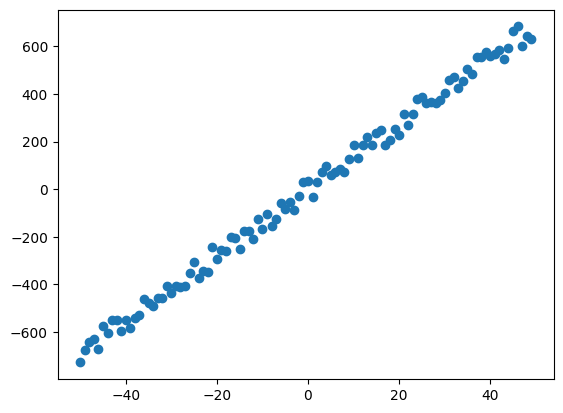

In [84]:
num_points = 100
rand_scale = 100
_a = 13.78
x_0 = np.array([i-50 for i in range(num_points)])
x = x_0
y = _a*x_0+rand_scale*np.random.rand(num_points)-rand_scale/2

plt.scatter(x, y)

## Von Hand
Zuerst können wir versuchen, die Steigung von Hand zu berechnen. Falls ihr den vorherigen Code versteht, könnt ihr dort natürlich die korrekte Steigung ablesen.

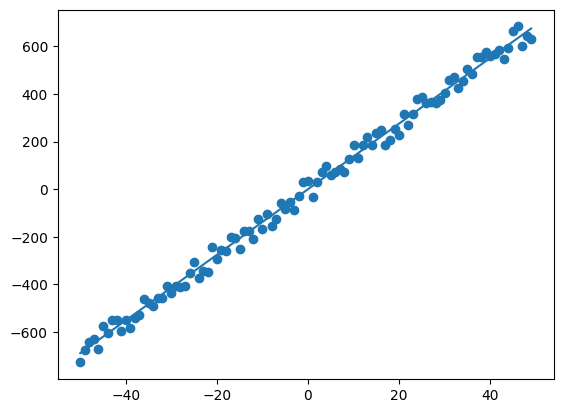

In [85]:
#TODO Verändert dieses a damit die Linie gut auf den Daten liegt.
a = 13.78

plt.scatter(x, y)
plt.plot(x, a*x)

## Gradientenverfahren implementieren
Im Folgenden implementieren wir das Gradientenverfahren. $f$ ist die Funktion, die wir minimieren möchten. Wir nehmen an, dass $f$.gradient($p$) uns die Ableitung an der Stelle $p$ liefert. Diese definieren wir als Nächstes.

In [86]:
def gradientenverfahren(f, p_0, T, lr):
    print(f"Starting gradient descent with parameter p_0={p_0}, T={T}, and learning rate lr={lr}.")
    p = p_0
    # TODO Berechne p T mal iterativ neu über den Gradientenabstieg, von f, mit Lernrate lr
    for _ in range(T):
        p -= lr*f.gradient(p)
    print(f"Ended gradient descent with parameter p={p} and a gradient of {f.gradient(p)}.")
    return p

## Lineare Regression definieren
Jetzt definieren wir die Funktion, welche es zu minimieren gilt. Konkret handelt es sich hierbei um $f(a) = ||g(x)-y||^2 = ||ax-y||^2$, wobei wir hier nach $a$ und nicht nach $x$ optimieren und $x$ sowie $y$ vectoren voller Datenpunkte sind. Also es gilt für das optimale $g$ dass $\forall i : g(x_i)=y_i$

In [87]:
class Linear_Regression():
    def __init__(self, x, y): # Hier speichern wir uns die Daten. Später kann man auf sie zurückgreifen mit self.x und self.y
        self.x = x
        self.y = y
    
    def __call__(self, a):
        # TODO berechne die Vorhersage, also ax. Diese Funktion wird für die Zeichnungen verwendet.
        return a*self.x

    def gradient(self, a):
        # TODO berechne den Gradienten des quadratischen Fehlers in Bezug auf a. Also konkreter ||ax-y||^2=a^2||x||^2+||y||^2-2a<x,y>.
        # Die Ableitung nach a ist dann 2a||x||^2-2<x,y>
        result = 2*a*(np.linalg.norm(self.x)**2)-(2*np.inner(self.x,self.y)) 
        return result

## Lineare Regression per Gradientenverfahren trainieren
Jetzt müssen wir nur die folgende Zelle ausführen und alles "sollte klappen".

Starting gradient descent with parameter p_0=0, T=10, and learning rate lr=1e-05.
Ended gradient descent with parameter p=13.61500890369666 and a gradient of -40257.581052406225.


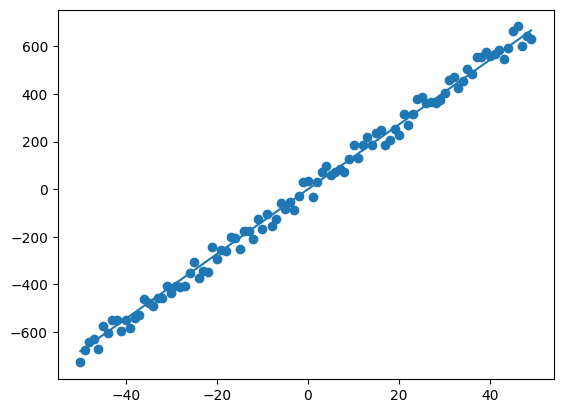

In [88]:
model = Linear_Regression(x,y)
a_sol = gradientenverfahren(f=model, p_0=0, T=10, lr=0.00001)
plt.scatter(x, y)
plt.plot(x, model(a_sol))

Vermutlich scheitert das Gradientenverfahren, weil wir zu wenige Schritte machen, also $T$ zu klein ist, und/oder weil die Lernrate $lr$ zu groß oder zu klein gewählt ist. Versuche mal $lr$ zu verringern und $T$ zu erhöhen bis die Optimierung nicht mehr divergiert.

# 2. Lineare Regression mit y-Achsenabschnitt
Wir verwenden denselben Datensatz und den bisherigen Code, passen jedoch unsere Klasse für lineare Regression an. Im Machinellen lernen benutzt man für den y-Achsenabschnitt den Term bias, welcher im folgenden einige male auftreten wird.

Zuerst passen wir die Daten an, damit das Problem interessanter wird:

In [89]:
b = 53
y = _a*x_0+b+rand_scale*np.random.rand(num_points)-rand_scale/2

Stelle sicher, dass im folgenden Code deine Wahl von $T$ und $lr$ übernommen ist. Jetzt stellen wir sicher, dass unser vorheriges Modell nicht funktioniert. Führe einfach den folgenden code aus

Starting gradient descent with parameter p_0=0, T=10, and learning rate lr=1e-05.
Ended gradient descent with parameter p=13.454833446873923 and a gradient of -39783.965759074315.


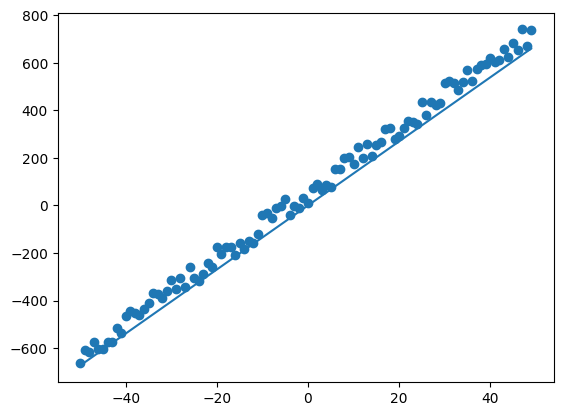

In [90]:
model = Linear_Regression(x,y)
a_sol = gradientenverfahren(f=model, p_0=0, T=10, lr=0.00001)
plt.scatter(x, y)
plt.plot(x, model(a_sol))

Man sollte jetzt sehen, dass das Modell leicht daneben liegt. Dies liegt daran, dass wir bis jetzt keinen $b$-Term ($g(x)=ax+b$) hatten. Die Funktion kann die Daten deshalb nicht perfekt abbilden. Also fügen wir jetzt diesen $b$-Term hinzu.

Dafür definieren wir die neue Klasse:

In [91]:
class Linear_Regression_Bias():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __call__(self, p):
        # TODO Wir nehmen an, dass a und b in p verpackt sind. Konkret a = p[0] und b=p[1].
        # Berechne die Vorhersage, also ax+b. Diese Funktion wird für die Zeichnungen verwendet. 
        return p[0]*self.x+p[1]

    def gradient(self, p):
        # TODO berechne den gradienten des quadratischen Fehlers in Bezug auf a und b. 
        # Wie zuvor a=p[0], b=p[1]. Konkreter, wo die 1en ein vektor voller 1 darstellt (np.ones(len(x))) und n die Anzahl an Datenpunkten ist (len(x)):
        # ||ax+1b-y||^2=a^2||x||^2+||y||^2+nb^2+2ab<1,x>-2a<x,y>-2b<1,y>.
        # Die Ableitung nach a ist dann 2a||x||^2-2<x,y>+2b<1,x> = 2(a||x||^2-<x,y>+b<1,x>)
        # Die Ableitung nach b ist dann 2a<1,x>-2<1,y>+2nb = 2(a<1,x>-<1,y>+nb)
        # Diese Funktion sollte ein np.array, mit der Ableitung nach a an der ersten und der Ableitung nach b and der zweiten Stelle, zurückliefern.
        n = len(self.x)
        one = np.ones(n)
        return np.array([2*(p[0]*(np.linalg.norm(self.x)**2)-np.inner(self.x, self.y)+p[1]*np.inner(self.x,one)),
                         2*(p[0]*np.inner(one, self.x)-np.inner(one, self.y)+n*p[1])])

Starting gradient descent with parameter p_0=[0. 0.], T=10000, and learning rate lr=1e-05.
Ended gradient descent with parameter p=[13.72501505 52.55307986] and a gradient of [-1.30366971e-08 -2.13595486e-05].


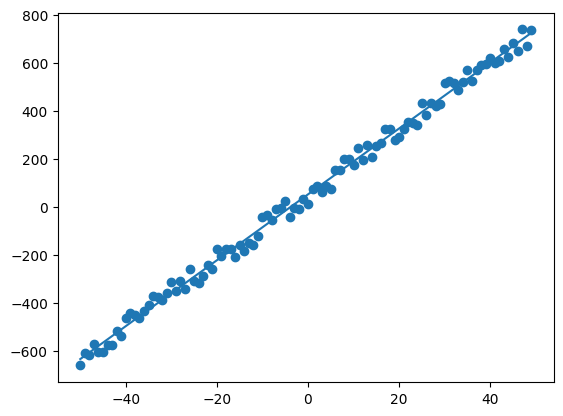

In [92]:
model = Linear_Regression_Bias(x,y)
p_sol = gradientenverfahren(f=Linear_Regression_Bias(x,y), p_0=np.array([0.0,0.0]), T=10000, lr=0.00001)
plt.scatter(x, y)
plt.plot(x, model(p_sol))

# 3. Nicht-Lineare Regression
Im Folgenden betrachten wir Datensätze, die nicht linear approximierbar sind. Man kann beliebige, auch nichtlineare, Funktionen betrachten, solange sie ableitbar sind. Je nachdem wieviel zeit ihr noch habt würde ich empfehlen, dass ihr hier nichts lösst sondern euch nur vor Augen führt was es hier zu tun gilt.

Erinnert euch, dass es hier darum geht dass wir $f(p) = ||g_p(x)-y||^2$ optimieren. Also $g$ hängt von den Parametern $p$ ab und wir versuchen $p$ zu finden. Im folgenden nehmen wir an, dass $g(x)=ax^2+bx+c$ oder $g(x)=a^x$. Es gilt diesmal aber alles selbst zu machen, also Ableitungen müsst ihr selbst berechnen.

## Quadratisch

In [ ]:
num_points = 100
rand_scale = 300
a = 1
b = 0.5
c = 2
x_0 = np.array([i-50 for i in range(num_points)])
x = x_0
y = a*x_0**2+b*x_0+c+rand_scale*np.random.rand(num_points)-rand_scale/2

plt.scatter(x, y)

Hier könnte man jetzt eine neue Klasse definieren mit einem quadratischen Modell. Dafür muss man lediglich die Berechnung der Funktion und die Berechnung der Ableitung anpassen.

In [ ]:
# TODO: definiere Klasse

In [ ]:
model = Linear_Regression_Bias(x,y)
p_sol = gradientenverfahren(f=model, p_0=np.array([0,0]), T=10000, lr=0.00001)
plt.scatter(x, y)
plt.plot(x, model(x))

## Exponentiell

In [ ]:
num_points = 100
rand_scale = 10
a = 1.1
x_0 = np.array([i-50 for i in range(num_points)])
x = x_0
y = a**x_0+rand_scale*np.random.rand(num_points)-rand_scale/2

plt.scatter(x, y)

Hier könnte man jetzt eine neue Klasse definieren mit einem exponentiellen Modell. Dafür muss man lediglich die Berechnung der Funktion und die Berechnung der Ableitung anpassen.

In [ ]:
# TODO

In [ ]:
model = Linear_Regression_Bias(x,y)
p_sol = gradientenverfahren(f=model, p_0=np.array([0,0]), T=1000, lr=0.000001)
plt.scatter(x, y)
plt.plot(x, model(x))

# 4. Mehrdimensionale Lineare Regression
Im Folgenden betrachten wir den Fall, dass $x$ nicht mehr eindimensional, sondern mehrdimensional ist, konkret am Beispiel von 3 Dimensionen (kann auch abgeändert werden).

## Datensatz
Erst erstellen wir einen Mehrdimensionalen Datensatz. Einfach die folgende Zelle ausführen.

In [93]:
num_points = 100
dimensions = 3
rand_scale = 0.2
w = np.random.rand(dimensions)
X = np.random.rand(num_points, dimensions) # X ist eine matrix also schreiben wir X ab jetzt groß
y = np.matmul(X, w)#+rand_scale*np.random.rand(num_points)-rand_scale/2 # Der Fehler wurde hier fürs erste auskommentiert

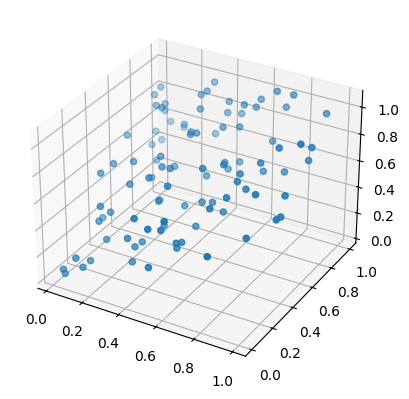

In [94]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X[:,0], X[:,1], y)

3-dimensionale Daten zu visualisieren ist nicht einfach. Deshalb vergleichen wir ab jetzt nur noch unsere gefundenen Parameter $w_\text{sol}$​ mit den wahren Parametern $w$. Man könnte auch den Verlust betrachten, also den quadratischen Fehler. Je kleiner, desto besser.

Je nachdem, wie allgemein zuvor das Gradientenverfahren implementiert wurde, muss man das hier nicht neu implementieren. Aber falls doch, hier ist das Grundgerüst noch einmal:

In [95]:
if False:
    def gradientenverfahren(f, p_0, T, lr):
        print(f"Starting gradient descent with parameter p_0={p_0}, T={T}, and learning rate lr={lr}.")
        p = p_0
        # TODO Berechne p T mal iterativ neu über den Gradientenabstieg, von f, mit Lernrate lr
        
        print(f"Ended gradient descent with parameter p={p} and a gradient of {f.gradient(p)}.")
        return p

Und zu guter Letzt muss wieder das Modell definiert werden.

In [96]:
class Linear_Regression():
    def __init__(self, X, y): # Hier speichern wir uns die Daten. Später kann man auf sie zurückgreifen mit self.X und self.y. Da X eine Matrix ist, X groß.
        self.X = X
        self.y = y
    
    def __call__(self, w):
        # TODO Wie zuvor berechne die Vorhersage. Diesmal ist er mehrdimensional und lässt sich mit Matrix multiplikation so beschreiben:
        # Xw, mit X matrix, w Vektor
        return np.matmul(self.X, w) 

    def gradient(self, w):
        # TODO berechne den gradienten des quadratischen Fehlers in Bezug auf w. Also konkreter ||Xw-y||^2=||Xw||^2+||y||^2-2w^TX^Ty.
        # Die Ableitung nach w (ein Vektor) ist dann 2X^TXw-2X^Ty = 2X^T(Xw-y).
        return 2*np.matmul(self.X.T, (np.matmul(self.X, w)-self.y))

In [98]:
model = Linear_Regression(X,y)
w_sol = gradientenverfahren(f=model, p_0=np.zeros(dimensions), T=100000, lr=0.00001)

print(f'The true parameter is {w} while the found parameter is {w_sol} thus the difference is {w-w_sol} which in metric terms is {np.linalg.norm(w-w_sol)} far away from the korrekt answer.')

Starting gradient descent with parameter p_0=[0. 0. 0.], T=100000, and learning rate lr=1e-05.
Ended gradient descent with parameter p=[0.29666522 0.47126044 0.46179045] and a gradient of [ 1.65989501e-07  4.57465351e-07 -6.88977342e-07].
The true parameter is [0.29666521 0.47126041 0.4617905 ] while the found parameter is [0.29666522 0.47126044 0.46179045] thus the difference is [-1.14417155e-08 -3.35132296e-08  4.98363176e-08] which in metric terms is 6.113679713891175e-08 far away from the korrekt answer.


Das Interessante an der mehrdimensionalen Variante ist, dass man einen y-Achsenabschnitt sehr einfach integrieren kann. Konkret betrachten wir dann $f(X)=Xw+b=[X|1][w|b]$, hier heißt $[X|1]$, dass wir an die matrix $X$ einen Vektor voller 1en konkatenieren, und $[w|b]$ heißt, dass wir an $w$ $b$ konkatenieren. Somit müssen wir lediglich unser $w$ um ein Element verlängern und an alle Datenpunkte eine 1 anhängen. Das wird bereits in der folgenden Zelle durchgeführt.

In [99]:
b = np.array([0.67])
y = np.matmul(X, w)+b
w_bias = np.concatenate([w, b])

X = np.concatenate([X, np.ones(num_points)[:,None]], axis=1)

Dann folgt die gleiche Optimierung wie zuvor:

In [100]:
model = Linear_Regression(X,y)
w_sol = gradientenverfahren(f=model, p_0=np.zeros(dimensions+1), T=1000, lr=0.001)
print(f'Der wahre parameter ist {w_bias} und der gefundene parameter is {w_sol} somit ist der Unterschied {w_bias-w_sol} und in metrischen Termen sind wir {np.linalg.norm(w_bias-w_sol)} weit von der optimalen Lösung entfernt.')

Starting gradient descent with parameter p_0=[0. 0. 0. 0.], T=1000, and learning rate lr=0.001.
Ended gradient descent with parameter p=[0.29666445 0.4712599  0.46179015 0.67000082] and a gradient of [-8.04928399e-06 -5.30358099e-06 -3.91729480e-06  8.74397491e-06].
Der wahre parameter ist [0.29666521 0.47126041 0.4617905  0.67      ] und der gefundene parameter is [0.29666445 0.4712599  0.46179015 0.67000082] somit ist der Unterschied [ 7.56787521e-07  5.06009945e-07  3.52303076e-07 -8.18478101e-07] und in metrischen Termen sind wir 1.273890605510738e-06 weit von der optimalen Lösung entfernt.


# 5 Neuronale Netze
Zuletzt können wir dasselbe wie zuvor auch mit neuronalen Netzen durchführen. Neuronale Netze haben den Vorteil, dass sie jede Funktion darstellen können, unter ein paar Annahmen, zu denen wir gleich kommen.

Ein neuronales Netz lässt sich beschreiben als $f(x)=w^T\sigma(Wx+b_2)+b_1$, wobei die Eingabe $x$ $d$-dimensional ist und $w\in\mathbb R^h$, $W\in\mathbb R^{h \times d}$, $b_2\in\mathbb R^h$, $b_1\in \mathbb R$. $\sigma$ ist eine Aktivierungsfunktion und wir werden hier die Sigmoid-Funktion verwenden, also $\sigma(x)=\frac{1}{1+\exp(-x)}$. $h$ ist hier die versteckte Dimension und je größer $h$ ist, desto "komplexer" kann die Funktion sein, die das neuronale Netz berechnen kann. Das hier beschriebene neuronale Netz hat $d$ Eingabeneuronen, $h$ versteckte Neuronen und 1 Ausgabeneuron. Das neuronale Netz hat 2 Schichten, konkret gibt es zwei lineare Operationen $w$ und $W$, welche Neuronen transformieren. $h$ entspricht also einer der Annahmen zuvor. Konkreter gesagt, gegeben eine Funktion $f$, eine beschränkte Domäne, auf der wir arbeiten, und einen Approximationsfaktor: Falls $h$ groß genug gewählt ist, kann das neuronale Netz $f$ in dieser Domäne dem Approximationsfaktor entsprechend approximieren.

In der Realität werden auch viel tiefere neuronale Netze betrachtet, aber wir bleiben hier bei diesem einfachen Beispiel. Außerdem gibt es in der Realität auch andere Schichten. Die hier verwendeten Schichten werden typischerweise als vollständig verbundene Schicht (fully connected layer) beschrieben, und es gibt zum Beispiel auch Batchnorm-Schichten (batchnorm layer) oder Convolutional-Schichten (convolutional layer).

Das hier beschriebene neuronale Netz ist ein Multilayer Perceptron (MLP) mit zwei Schichten, einer versteckten Dimension von $h$ und der Sigmoid-Aktivierungsfunktion.

Die Berechnung der Gradienten der Parameter (in diesem Falle $w, W, b_2, b_1$) hängt stark von der Kettenregel ab und verläuft in einem Vorwärts- und Rückwärtsschritt. Konkret nennt man diese Methode Backpropagation, und sie verläuft in einem Vorwärtspass und einem Rückwärtspass. Weil das alles etwas zu kompliziert ist für die kurze Zeit, habe ich im Folgenden ein neuronales Netz definiert mit seiner Ableitung, damit ihr es ausprobieren könnt und eventuell sogar verstehen könnt, was hier abläuft.

In [101]:
def sigmoid(x):
    return 1.0/(1.0+(np.exp(-x)))

def siggrad(x):
    return x*(1-x)

class MLP_Regression():
    def __init__(self, X, y): # Hier speichern wir uns die Daten. Später kann man auf sie zurückgreifen mit self.X und self.y. Da X eine Matrix ist, X groß.
        self.X = X
        self.y = y
    
    def __call__(self, p):
        w, W, b2, b1 = p
        return (np.matmul(w.T, sigmoid(np.matmul(W, self.X)+b2))+b1).T

    def gradient(self, p):
        w, W, b2, b1 = p
        
        # Forward pass. Hier werden die Komponenten für später vorberechnet
        d  = sigmoid(np.matmul(W, self.X)+b2)
        
        o  = np.matmul(w.T, d)+b1-self.y
        
        # Backward pass. Hier werden die im Forward pass berechneten Komponenten für die gradienten benutzt.
        wgrad  = 2*np.matmul(d, o.T)
        b1grad = 2*np.sum(o) # Oder matmul mit 1
        w_d = np.multiply(w ,siggrad(d)) # elementweise multiplikation
        Wgrad  = 2*np.matmul(w_d, np.matmul(np.diag(o.flatten()), self.X.T)) # Das was hier zuletzt passiet ist eigentlich sehr komplex und nicht so einfach herleitbar. Konkret wird ein Vektor nach einer Matrix abgeleitet und wir arbeiten mit Tensoren. Das lässt sich aber alles wie hier beschrieben vereinfachen.
        b2grad  = 2*np.matmul(w_d, o.T)
        
        return wgrad, Wgrad, b2grad, b1grad

Hier ist eine leicht abgeänderte Version des zuvor beschriebenen Gradientenabstiegs.

In [102]:
def gradientenverfahrenmitmomentum(f, p_0, T, lr, beta=0.9):
    print(f"Starting gradient descent with momentum with parameter p_0={p_0}, T={T}, and learning rate lr={lr}.")
    p = p_0
    m = tuple([0*v for v in p])
    for t in range(T):
        grad = f.gradient(p)
        m = tuple([(beta*m[i])+((1-beta)*grad[i]) for i in range(len(m))])
        p = tuple([p[i]-(lr*m[i]/(1-(beta**(t+1)))) for i in range(len(p))])
    print(f"Ended gradient descent with momentum with parameter p={p} and a gradient of {f.gradient(p)}.")
    return p

Neuronale Netze sollen in der Lage sein, alle Funktionen zu approximieren. Das probieren wir im Folgenden aus. Als Funktion, die es zu approximieren gilt, verwenden wir zunächst die Sinusfunktion mit einer Frequenz, also $y(x)=\sin(\lambda\pi x)$, in der Domäne $[0,1]$. Je höher wir $\lambda$ wählen desto mehr oszilliert die Funktion und desto schwieriger ist es für das neuronale Netz, die Funktion zu approximieren.

Da der folgende Prozess zufällig ist, kann es sein, dass ihr es mehrmals probieren müsst. Noch eine Anmerkung: Die Sigmoid-Aktivierungsfunktion ist eine eher alte Funktion und hat einen großen Nachteil. Ihre Ableitung wird sehr klein, wenn man sehr große (positive) oder kleine (große negative) Zahlen betrachtet. Also kann es sein, dass, wenn die Lernrate zu groß gewählt wird und der Optimierungsprozess divergiert, trotzdem ein sehr kleiner Gradient als Ergebnis produziert wird.

Im folgenden kann es sein, dass ihr je nach Wahl die Anzahl an Schritten $T$ erhöhen müsst, was aber die Laufzeit deutlich beeinflusst.

Starting gradient descent with momentum with parameter p_0=(array([[0.31980351],
       [0.57480485],
       [0.03226773]]), array([[0.11930986],
       [0.90576147],
       [0.36320315]]), array([[0.34297697],
       [0.01199443],
       [0.42491246]]), array([0.61146398])), T=20000, and learning rate lr=0.005.
Ended gradient descent with momentum with parameter p=(array([[ 5.47397637],
       [-6.36269394],
       [ 7.81325083]]), array([[5.27826924],
       [7.0136473 ],
       [3.852723  ]]), array([[ 0.23957478],
       [-3.58031423],
       [-3.9508022 ]]), array([-3.02770331])) and a gradient of (array([[-0.00621528],
       [ 0.00059903],
       [-0.00859814]]), array([[-0.01637977],
       [ 0.01357382],
       [-0.01053085]]), array([[-0.00232579],
       [-0.00551909],
       [ 0.01341611]]), 0.004910021829569178).


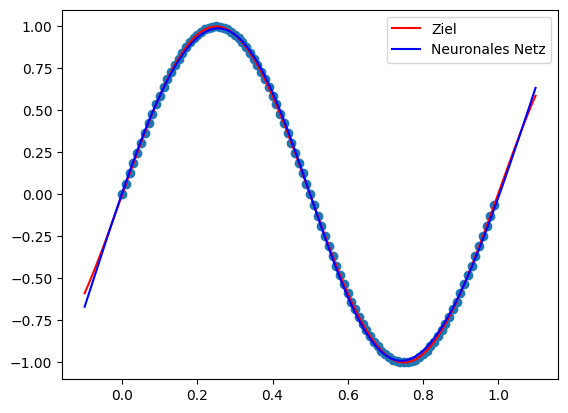

In [103]:
#TODO Ihr könnt gerne diese Funktion verändern um zu sehen was ein NN lernen kann. Erstmal würde ich aber empfehlen bei dieser Sinusfunktion zu bleiben.
def target(x):
    #TODO Fürs erste könt ihr hier lam erhöhen. Je höher lam gewählt wird umso höher muss auch h gewählt werden, aber es gibt keine 1:1 korrespondenz
    lam = 2
    return np.sin(lam*np.pi*x)

num_points = 100
X = np.expand_dims(np.array(np.arange(0, 1.0, 0.01)), axis=0) # TODO Ihr könnt die Datenhier auch gerne wieder zufällig ziehen, dann wird die Optimierung schwerer
y = target(X)
#TODO falls ihr mehr zufall wollt könnt ihr diese zwei Zeilen einkommentieren random_scale = 0.5
# y += (np.random.rand(y.shape[0], y.shape[1])-0.5) * random_scale

#TODO Dieses h hier könnt ihr verändern um auszuprobieren wieviel Komplexität das Neuronale Netz benötigt für eure gewählte Funktion.
h = 3
p = np.random.rand(h,1), np.random.rand(h,1), np.random.rand(h,1), np.random.rand(1) # Es ist wichtig zufällig (nicht mit 0) zu Initialisieren.

p = gradientenverfahrenmitmomentum(MLP_Regression(X,y), p, 20000, 0.005)

plt.scatter(X, y)
_X = np.expand_dims(np.array(np.arange(-0.1, 1.1, 0.01)), axis=0)
plt.plot(_X.T, target(_X.T), color='red', label='Ziel')
plt.plot(_X.T, MLP_Regression(_X, y)(p), color='blue', label='Neuronales Netz')
plt.legend()
plt.show()